mirror_driver.ipynb
Eric Graves - eridgraves@gmail.com
Created 06/30/2019

## Mechanical Mirror Test Code
Beta code to transfer images to a stylized "low-fi" mirror representation
As seen: https://www.smoothware.com/danny/newshinyballsmirror.html

In [1]:
# Imports and environment setup
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
%matplotlib inline

# DEBUG shows input and output images, DEBUG_VERBOSE shows images and sizes at each step
DEBUG = True
DEBUG_VERBOSE = False

if not DEBUG :
    DEBUG_VERBOSE = False # Can only be enabled in DEBUG mode

# Test image name
TEST_IMAGE = 'Lenna.png'#'image5.png'

In [2]:
img = cv.imread(TEST_IMAGE, 0)
h,w = img.shape[:2]
if DEBUG_VERBOSE :
    print(img.shape)
    plt.imshow(img,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()

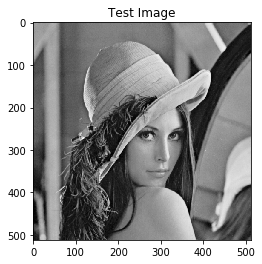

(512, 512)


In [3]:
# Determine refresh rate --> probably 1/sec or so

# Get an image and crop to square 
img_crop = img[0:h,0:h] #img.crop(0,0,h,h) #img[0:w,0:w] 
if DEBUG : 
    plt.imshow(img_crop,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()
    print(img_crop.shape)
    
# Make destination image of same size
dst = np.zeros(h);

# Use Median Blur to average pixel areas over 50 x 50 regions
#-- Calculate kernel size : must be odd
mb_kern = (int) (h/50)
if mb_kern % 2 == 0:
    mb_kern += 1
#-- Blur over kernal size 
dst = cv.medianBlur(img_crop, mb_kern)
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Blurred Image")
    plt.show()
    print(dst.shape)

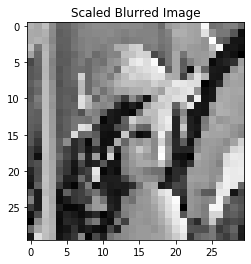

(30, 30)
[[170 163 180 145 116 118 129 136 141 144 144 143 142 144 143 143 137 137
  122 154 161 166 162 160 220 125 128 136 136 119]
 [165 164 170 143 112 116 126 139 140 142 142 144 139 136 141 138 138 138
  128 137 169 168 162 159 204 149 130 130 107  56]
 [165 170 165 140 115 114 127 135 139 138 142 138 138 132 135 136 138 139
  129 133 159 163 162 158 150 224 117 107  61  61]
 [180 130 172 146 112 114 128 135 140 137 134 140 167 168 190 193 131 136
  125 131 156 162 155 153 149 179 219  60  63  57]
 [161 119 176 143 109 112 119 132 140 122 130 139 138 179 182 195 193  97
  114 129 164 128 156 153 155 164  58  65  58  46]
 [ 97 117 174 137 111 111 124 133 120 130 126 146 152 170 206 212 201 221
   92 129 163 110 137 152 156  53  65  72  80 157]
 [107 115 173 140 105 114 123 124 120 133 140 150 123 194 187 197 202 207
  220 113 164 112  56 177 116  65  63  61 149 165]
 [107 113 174 139 107 115 124 193 120 141 148 134 162 178 195 190 194 206
  204 169 165  91 163 204 173  63  62 151 

In [19]:
## SQUARE OUTPUT PIXELS IN A GRID 

# Resize image to 50x50 pixels
#-- From Median Blurred Image : looks better
out = cv.resize(dst, (30,30))
if DEBUG : 
    plt.imshow(out,cmap='gray') # Use grayscale image
    plt.title("Scaled Blurred Image")
    plt.show()
    print(out.shape)
    print(out)
    
#-- Without Median Blur
dst = cv.resize(img_crop, (30,30))
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Unblurred Image")
    plt.show()
    print(dst.shape)

In [57]:
## Square OUTPUT PIXELS IN DIAGONAL GRID
##-- Stagger each row so that pixels form lines at 45degrees (or so)
##-- Center of pixels above will line up with the edges

# Get cell size
cell_diam = 30
cell_radius = (int) (cell_diam / 2)
if cell_radius % 2 == 0:
    cell_radius += 1
    
## Get first row of areas centers
centers = []
centers_y = []
REG_FLAG = True
cell_center = cell_radius

# For rows of cells in the image
for j in range(cell_center, h , cell_radius):
    
    # Reset temporary array
    temp = []
    
    if(REG_FLAG):
        # Offset center column
        for i in range(cell_diam, h - cell_diam, cell_diam):
            temp.append(i) # Just x values
            #temp.append((i, j)) # Append coordinates
        row = np.array(temp)
        centers.append(row)
        REG_FLAG = False
    
    else : 
        # Regular Center column
        for i in range(cell_radius, h - cell_diam, cell_diam): # Cut off rightmost point to make rows have equal number of members
            temp.append(i) # Just x values
            #temp.append((i, j)) # Append coordinates
        row_d = np.array(temp)
        centers.append(row_d)
        REG_FLAG = True

    centers_y.append(j) # Append y coordinates to separate array
    

centers_y = np.array(centers_y)
print(centers_x)
# Centers now has coordinates of center points in form (x_coord, y_coord)
if DEBUG:
    print("CENTER_COORD: ")
    print(centers_y.shape)

## For each center point:
for point in centers_y:
    
    print(point)
    # Average values of each point within cell_radius
    for x_val in range(point - cell_radius, point + cell_radius):
        print(x_val)
    # (center_x - cell_radius, center_y - cell_radius) === (center_x + cell_radius, center_y - cell_radius)
    #  ||                                                                                              ||
    #  ||                                     (center_x, center_y)                                     ||
    #  ||                                                                                              ||
    # (center_x - cell_radius, center_y + cell_radius) === (center_x + cell_radius, center_y + cell_radius)
    
# Assign all cells within cell_radius this average value

[array([[  7,   7],
       [ 22,   7],
       [ 37,   7],
       [ 52,   7],
       [ 67,   7],
       [ 82,   7],
       [ 97,   7],
       [112,   7],
       [127,   7],
       [142,   7],
       [157,   7],
       [172,   7],
       [187,   7],
       [202,   7],
       [217,   7],
       [232,   7],
       [247,   7],
       [262,   7],
       [277,   7],
       [292,   7],
       [307,   7],
       [322,   7],
       [337,   7],
       [352,   7],
       [367,   7],
       [382,   7],
       [397,   7],
       [412,   7],
       [427,   7],
       [442,   7],
       [457,   7],
       [472,   7],
       [487,   7],
       [502,   7]]), array([[  0,  22],
       [ 15,  22],
       [ 30,  22],
       [ 45,  22],
       [ 60,  22],
       [ 75,  22],
       [ 90,  22],
       [105,  22],
       [120,  22],
       [135,  22],
       [150,  22],
       [165,  22],
       [180,  22],
       [195,  22],
       [210,  22],
       [225,  22],
       [240,  22],
       [255,  22],
       [2

In [9]:
# TODO:
#-- One region per motor
#-- Median filter? Or focus on edges, and transfer each to nearest region.

# Send to output
#-- Can this be parallelized?
#-- For now: print out as text